### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data merging and cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [7]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from pathlib import Path
from IPython.display import display, HTML

#### 2. Data merging


In [8]:
path = r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6'

In [9]:
file_paths = [
    r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\customers_cleaned.csv',
    r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\geological_cleaned.csv',
    r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\orderitems_cleaned.csv',
    r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\orderpayment_cleaned.csv',
    r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\orders_cleaned.csv',
    r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\products_cleaned.csv',
    r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\productscategory_cleaned.csv',
    r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\sellers_cleaned.csv'
]



In [10]:
for file in file_paths:
    df = pd.read_csv(file, sep=";") 
    print(f"Columns in {file}:")
    print(df.columns)
    print("=" * 50)

Columns in C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\customers_cleaned.csv:
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Columns in C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\geological_cleaned.csv:
Index(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')
Columns in C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\orderitems_cleaned.csv:
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Columns in C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\orderpayment_cleaned.csv:
Index(['order_id', 'payment_sequential', 'payment_type',
       'paym

In [ ]:

customers = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\customers_cleaned.csv", sep=";")
geolocation = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\geological_cleaned.csv", sep=";")
order_items = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\orderitems_cleaned.csv", sep=";")
order_payments = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\orderpayment_cleaned.csv", sep=";")
orders = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\orders_cleaned.csv", sep=";")
products = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\products_cleaned.csv", sep=";")
product_category = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\productscategory_cleaned.csv", sep=";")
sellers = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\sellers_cleaned.csv", sep=";")

merged_df = orders.merge(customers, on="customer_id", how="left")

merged_df = merged_df.merge(order_items, on="order_id", how="left")
merged_df = merged_df.merge(order_payments, on="order_id", how="left")

merged_df = merged_df.merge(products, on="product_id", how="left")

merged_df = merged_df.merge(product_category, on="product_category_name", how="left")

merged_df = merged_df.merge(sellers, on="seller_id", how="left")

merged_df = merged_df.merge(geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")
merged_df = merged_df.merge(geolocation, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left", suffixes=("_customer", "_seller"))

merged_df.to_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\final_merged_dataset.csv", index=False, sep=";")

print("meging done successfuly🎉")


In [13]:
#merged_df.to_csv(r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\merged_data.csv', index=False)


In [7]:
print(merged_df.head())  
print(merged_df.info())  


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_estimated_delivery_date  \
0    delivered                    18/10/2017   
1    delivered                    18/10/2017   
2    delivered                    18/10/2017   
3    delivered                    18/10/2017   
4    delivered                    18/10/2017   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff

In [8]:
print(merged_df.isnull().sum())  


order_id                                     0
customer_id                                  0
order_status                                 0
order_estimated_delivery_date                0
customer_unique_id                           0
customer_zip_code_prefix                     0
customer_city                                0
customer_state                               0
order_item_id                                0
product_id                                   0
seller_id                                    0
shipping_limit_date                          0
price                                        0
freight_value                                0
payment_sequential                         567
payment_type                               567
payment_installments                       567
payment_value                              567
product_category_name                   258378
product_category_name_english           261705
seller_zip_code_prefix                       0
seller_city  

In [9]:
num_rows, num_columns = merged_df.shape
print(f"number of rows: {num_rows}")
print(f"number of columns: {num_columns}")

number of rows: 18072338
number of columns: 33


In [10]:
# fill the missed values
merged_df['payment_sequential'] = merged_df['payment_sequential'].fillna(0)
merged_df['payment_type'] = merged_df['payment_type'].fillna('unknown')
merged_df['product_category_name'] = merged_df['product_category_name'].fillna('unknown')


In [11]:
merged_df.dropna(subset=['payment_installments', 'payment_value' , 'product_category_name_english' , 'geolocation_zip_code_prefix_customer' , 'geolocation_city_customer' , 'geolocation_state_customer' , 'geolocation_lat_customer' , 'geolocation_lng_customer' , 'geolocation_zip_code_prefix_seller' , 'geolocation_city_seller' , 'geolocation_city_seller' , 'geolocation_state_seller' , 'geolocation_lat_seller', 'geolocation_lng_seller'], inplace=True)


In [12]:
print(merged_df.isnull().sum()) 

order_id                                0
customer_id                             0
order_status                            0
order_estimated_delivery_date           0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
order_item_id                           0
product_id                              0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
product_category_name                   0
product_category_name_english           0
seller_zip_code_prefix                  0
seller_city                             0
seller_state                            0
geolocation_zip_code_prefix_custom

In [13]:
duplicated_rows = merged_df.duplicated()

In [14]:
print(f"number of duplicated rows: {duplicated_rows.sum()}")


number of duplicated rows: 0


### 3. Exploring Relationships

#### some basic checks

In [15]:
#checking data size
merged_df.shape

(17802941, 33)

In [16]:
#checking columns and data types
merged_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_estimated_delivery_date            object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
product_category_name                    object
product_category_name_english            object
seller_zip_code_prefix                  

In [17]:
#Create a correlation matrix
#Select only the numerical columns from the DataFrame to avoid errors
numerical_columns = merged_df.select_dtypes(include=['int', 'float'])

#The index ('rank') is one of the numerical columns, so we will drop it

if 'rank' in numerical_columns.columns:
    numerical_columns = numerical_columns.drop(columns=['rank'])

#Now, we create the correlation matrix with the appropriate data
numerical_columns.corr()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,geolocation_zip_code_prefix_customer,geolocation_zip_code_prefix_seller
customer_zip_code_prefix,1.000000,0.008858,0.041895,0.204064,-0.033004,0.049733,0.060590,0.085423,1.000000,0.085423
order_item_id,0.008858,1.000000,-0.066165,-0.043819,-0.008448,0.072448,0.281987,-0.016831,0.008858,-0.016831
price,0.041895,-0.066165,1.000000,0.409674,-0.004236,0.275676,0.764030,0.075019,0.041895,0.075019
freight_value,0.204064,-0.043819,0.409674,1.000000,0.003086,0.180003,0.384494,0.143559,0.204064,0.143559
payment_sequential,-0.033004,-0.008448,-0.004236,0.003086,1.000000,-0.093178,-0.074128,-0.004362,-0.033004,-0.004362
payment_installments,0.049733,0.072448,0.275676,0.180003,-0.093178,1.000000,0.287578,0.021674,0.049733,0.021674
payment_value,0.060590,0.281987,0.764030,0.384494,-0.074128,0.287578,1.000000,0.070122,0.060590,0.070122
seller_zip_code_prefix,0.085423,-0.016831,0.075019,0.143559,-0.004362,0.021674,0.070122,1.000000,0.085423,1.000000
geolocation_zip_code_prefix_customer,1.000000,0.008858,0.041895,0.204064,-0.033004,0.049733,0.060590,0.085423,1.000000,0.085423
geolocation_zip_code_prefix_seller,0.085423,-0.016831,0.075019,0.143559,-0.004362,0.021674,0.070122,1.000000,0.085423,1.000000


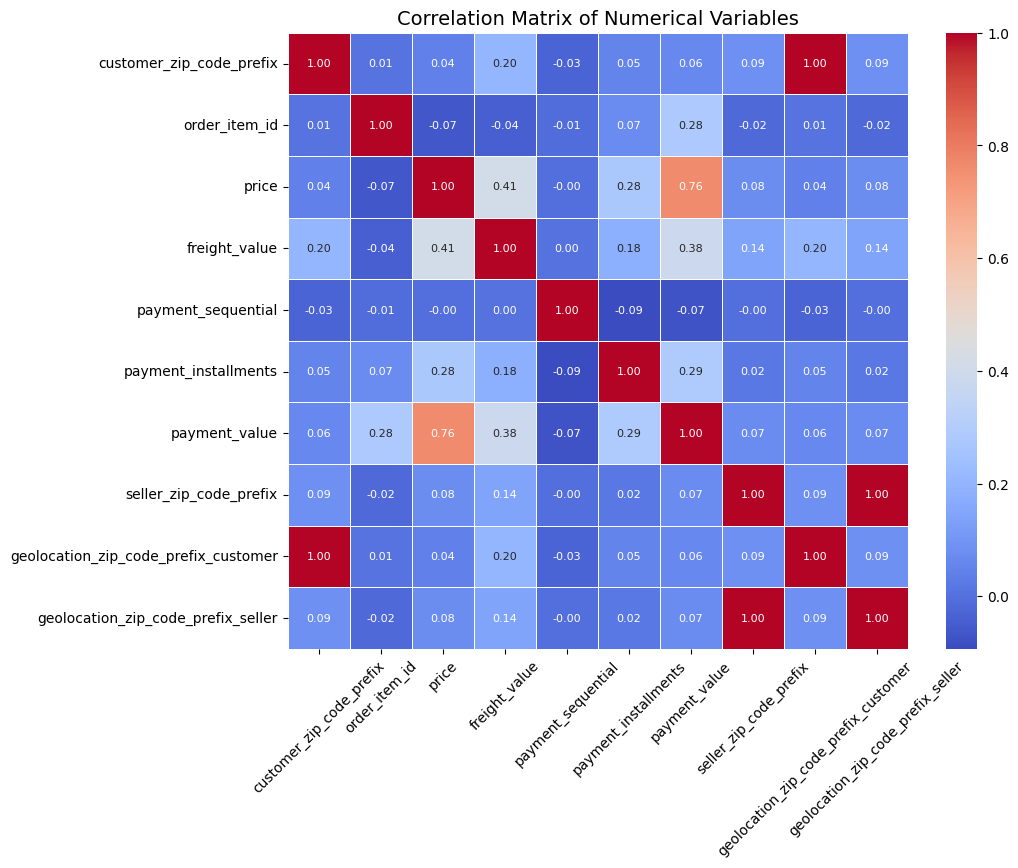

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate correlstion for numerical data only
corr_matrix = merged_df.select_dtypes(include=['float64', 'int64']).corr()

# draw correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [66]:


# Define the path
path = r'C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\4 Analysis\Visualizations'

# Select only the numeric columns
numeric_columns = merged_df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = merged_df[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix of Numerical Values')

# Save the figure as a PNG file
plt.savefig(os.path.join(path, 'correlation_matrix_of_numerical_values.png'))

# Optionally show the plot
# plt.show()

# Close the plot to avoid overlapping if there are other plots
plt.close()

#### Strong correlations (close to 1 or -1): 
Variables move together or oppositely (e.g., price and payment_value).
#### Weak correlations (close to 0):
Little to no relationship (e.g., customer_city and price).
#### Insights: 
Strong financial correlations suggest linked aspects like order value and payment. Weak geographical correlations suggest location isn’t a major factor in purchase behavior.
#### Next steps: 
Focus on strong correlations to optimize key areas like shipping costs, and explore weak correlations for new insights.
##### In short, 
it helps identify what impacts sales and customer behavior.

#### **QUESTION 4**
Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

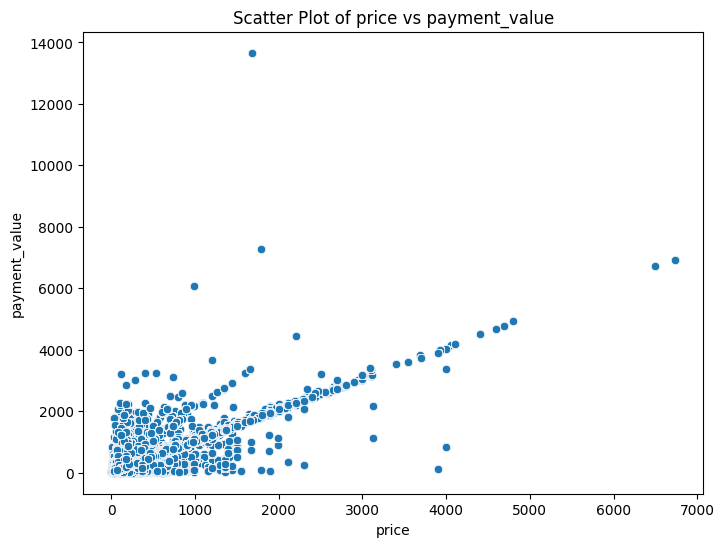

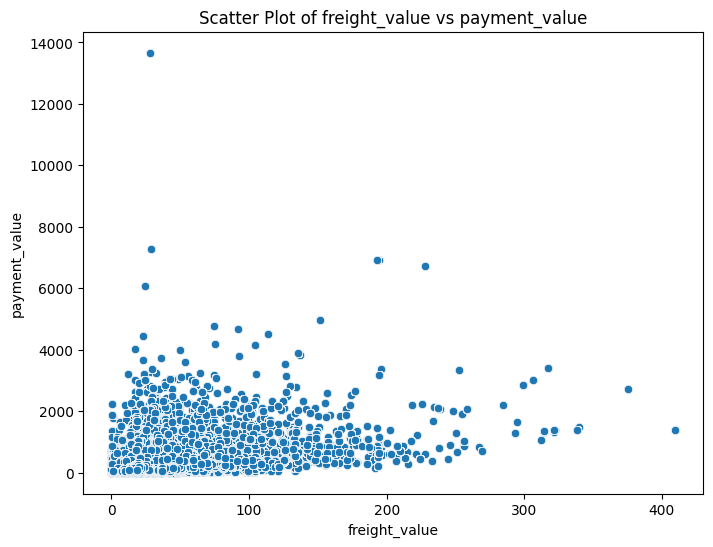

In [20]:

# Let's assume `df` is your cleaned DataFrame

# Example of strong correlations based on the correlation matrix (replace with your actual findings)
strong_corr_pairs = [
    ('price', 'payment_value'),  # Example of strong correlation pair
    ('freight_value', 'payment_value'),  # Another example (replace with actual)
    # Add more pairs here based on your correlation analysis
]

# Loop through strong correlation pairs and create scatter plots
for var1, var2 in strong_corr_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_df, x=var1, y=var2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()


In [62]:
#Export your visualizations as “.png” files

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

#### comments:
Price vs Payment Value:
A positive correlation is expected, meaning that as the price of products increases, the payment value also tends to increase.
This is a natural relationship where higher-priced products result in higher order amounts.
Freight Value vs Payment Value:

A positive correlation here suggests that higher shipping costs are generally associated with higher payment values, as expensive products often have higher shipping fees.

#### 5. Create a pair plot of the entire data set.

In [17]:
df_sample = merged_df.head(100000)


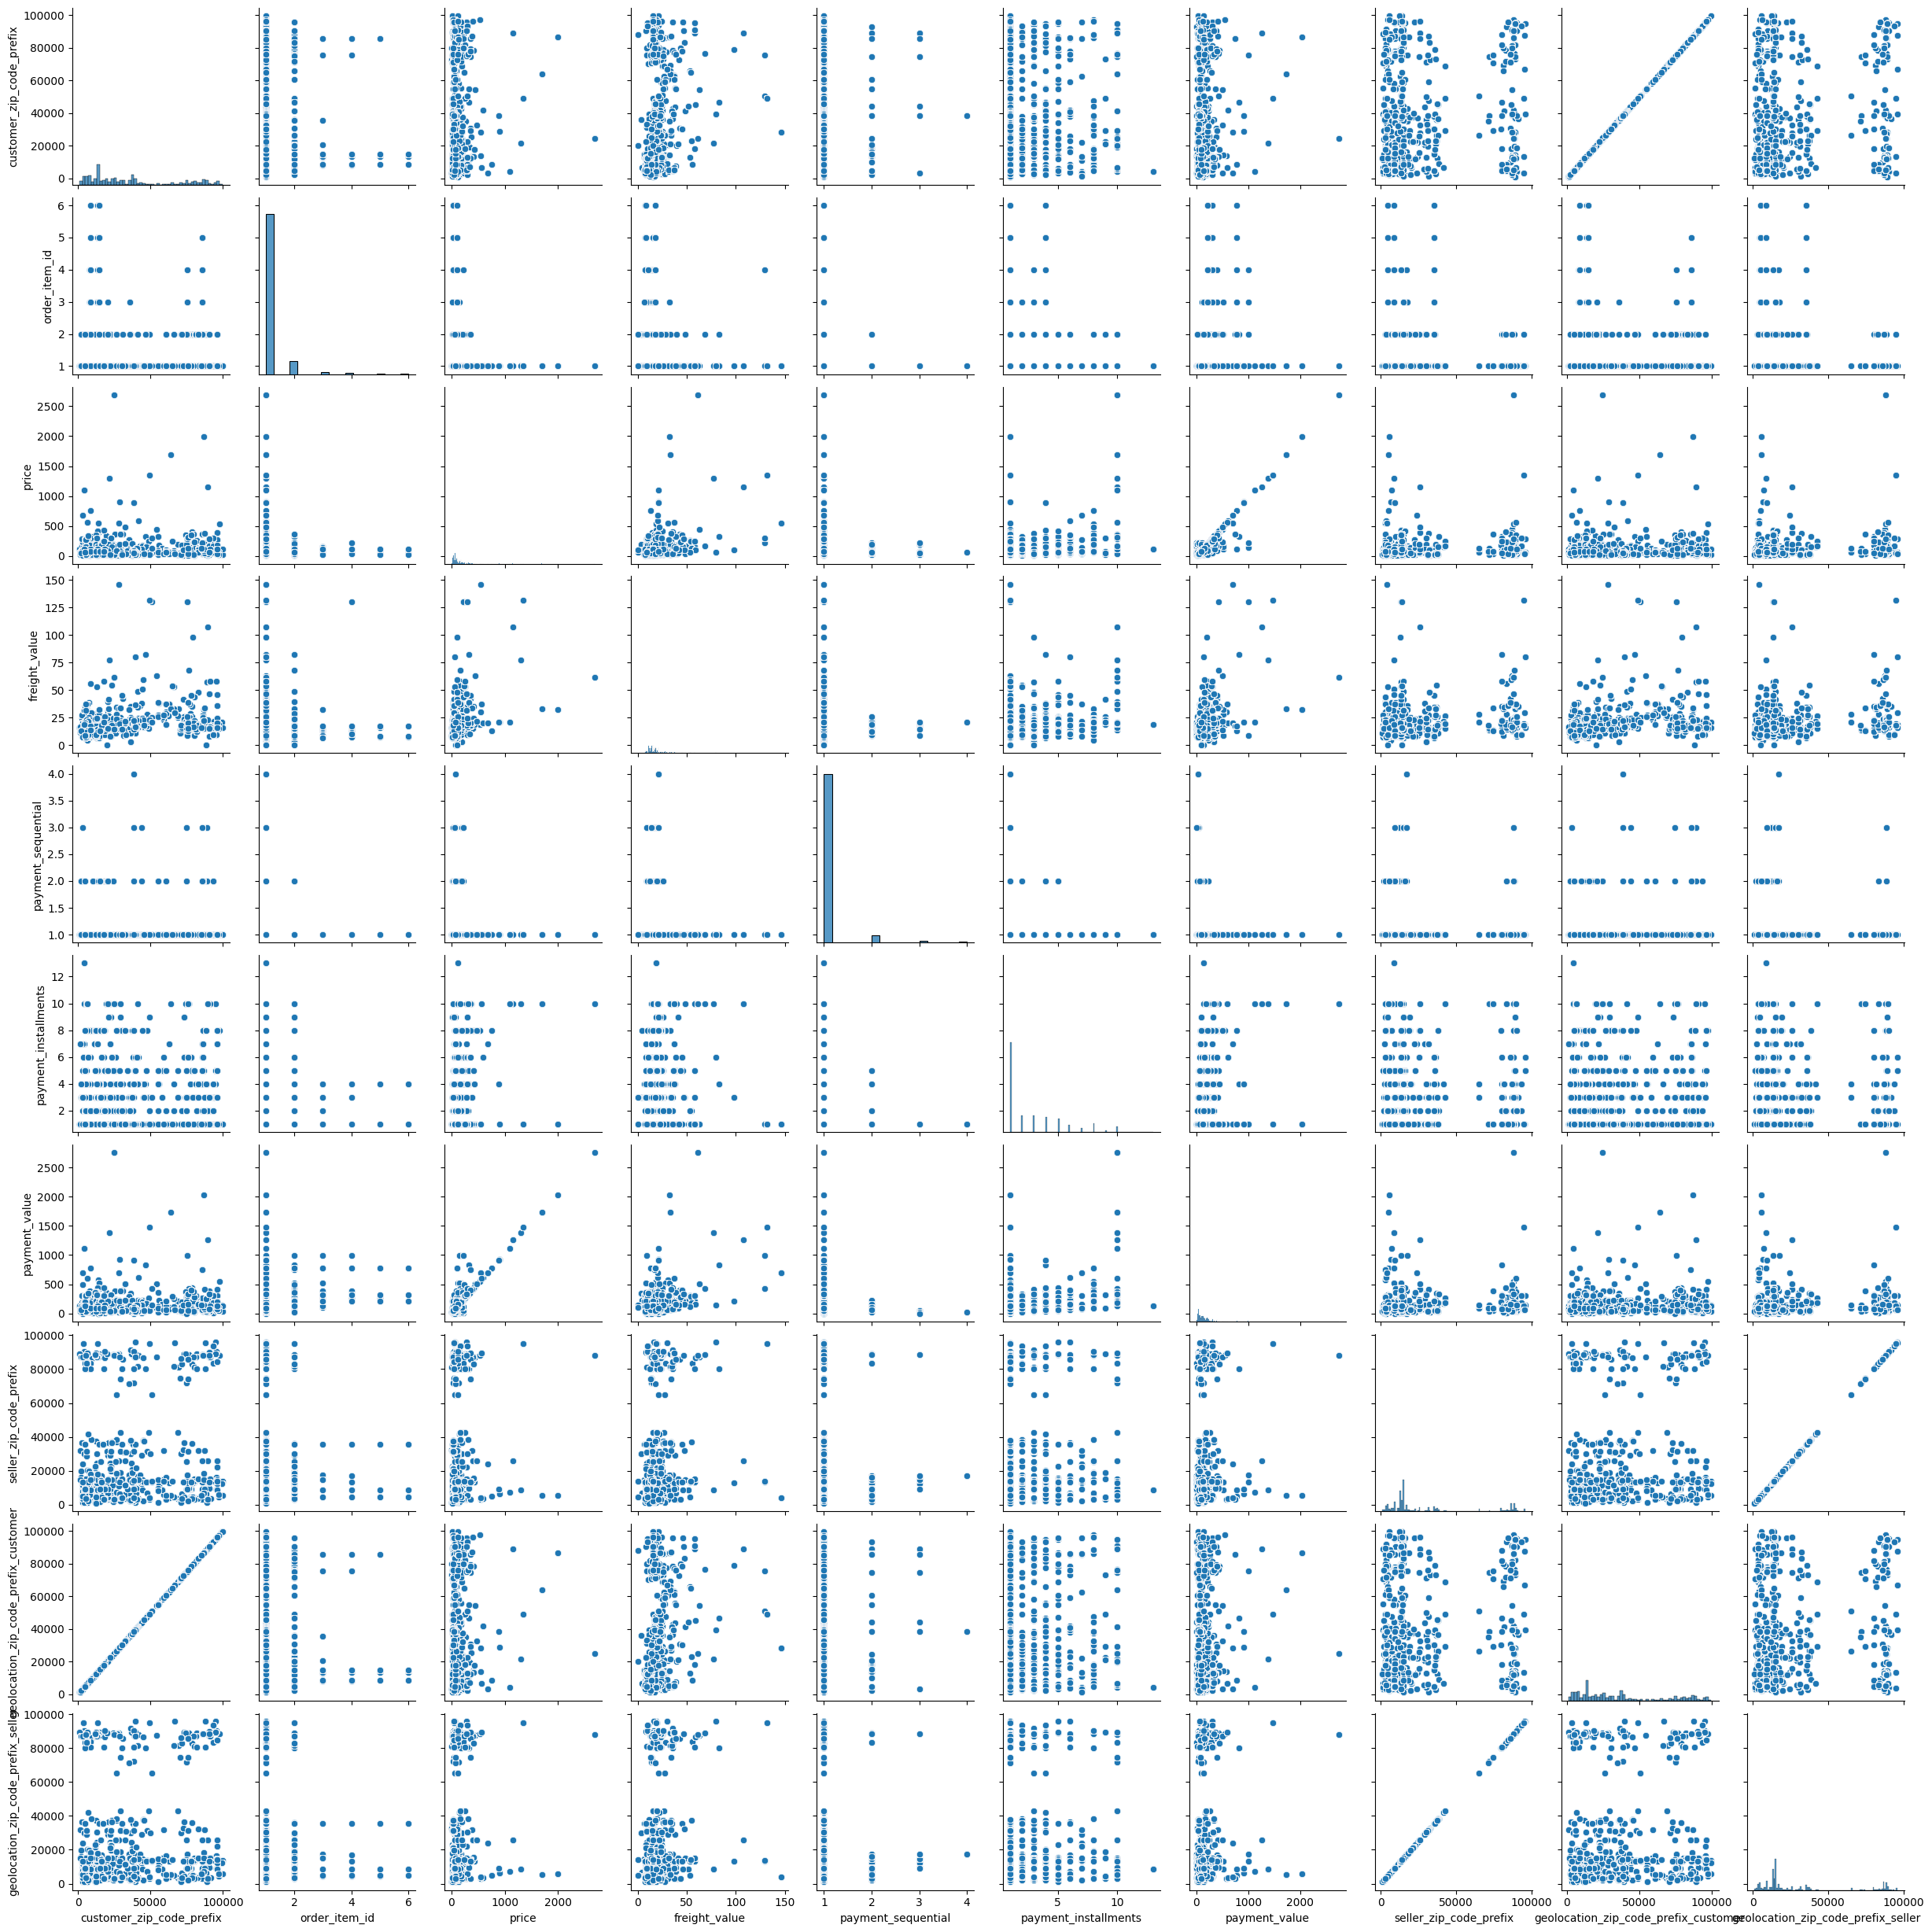

FileNotFoundError: [Errno 2] No such file or directory: 'C:/path/to/directory/pairplot.png'

<Figure size 640x480 with 0 Axes>

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the data is correct
numeric_cols = df_sample.select_dtypes(include=['number'])

# Draw the Pair Plot for numerical columns
sns.pairplot(numeric_cols)

# Display the plot in the Jupyter Notebook
plt.show()

# Save the plot as an image file after displaying it
plt.savefig(r'C:/path/to/directory/pairplot.png')

# Close the figure after saving to avoid issues in subsequent sessions
plt.close()


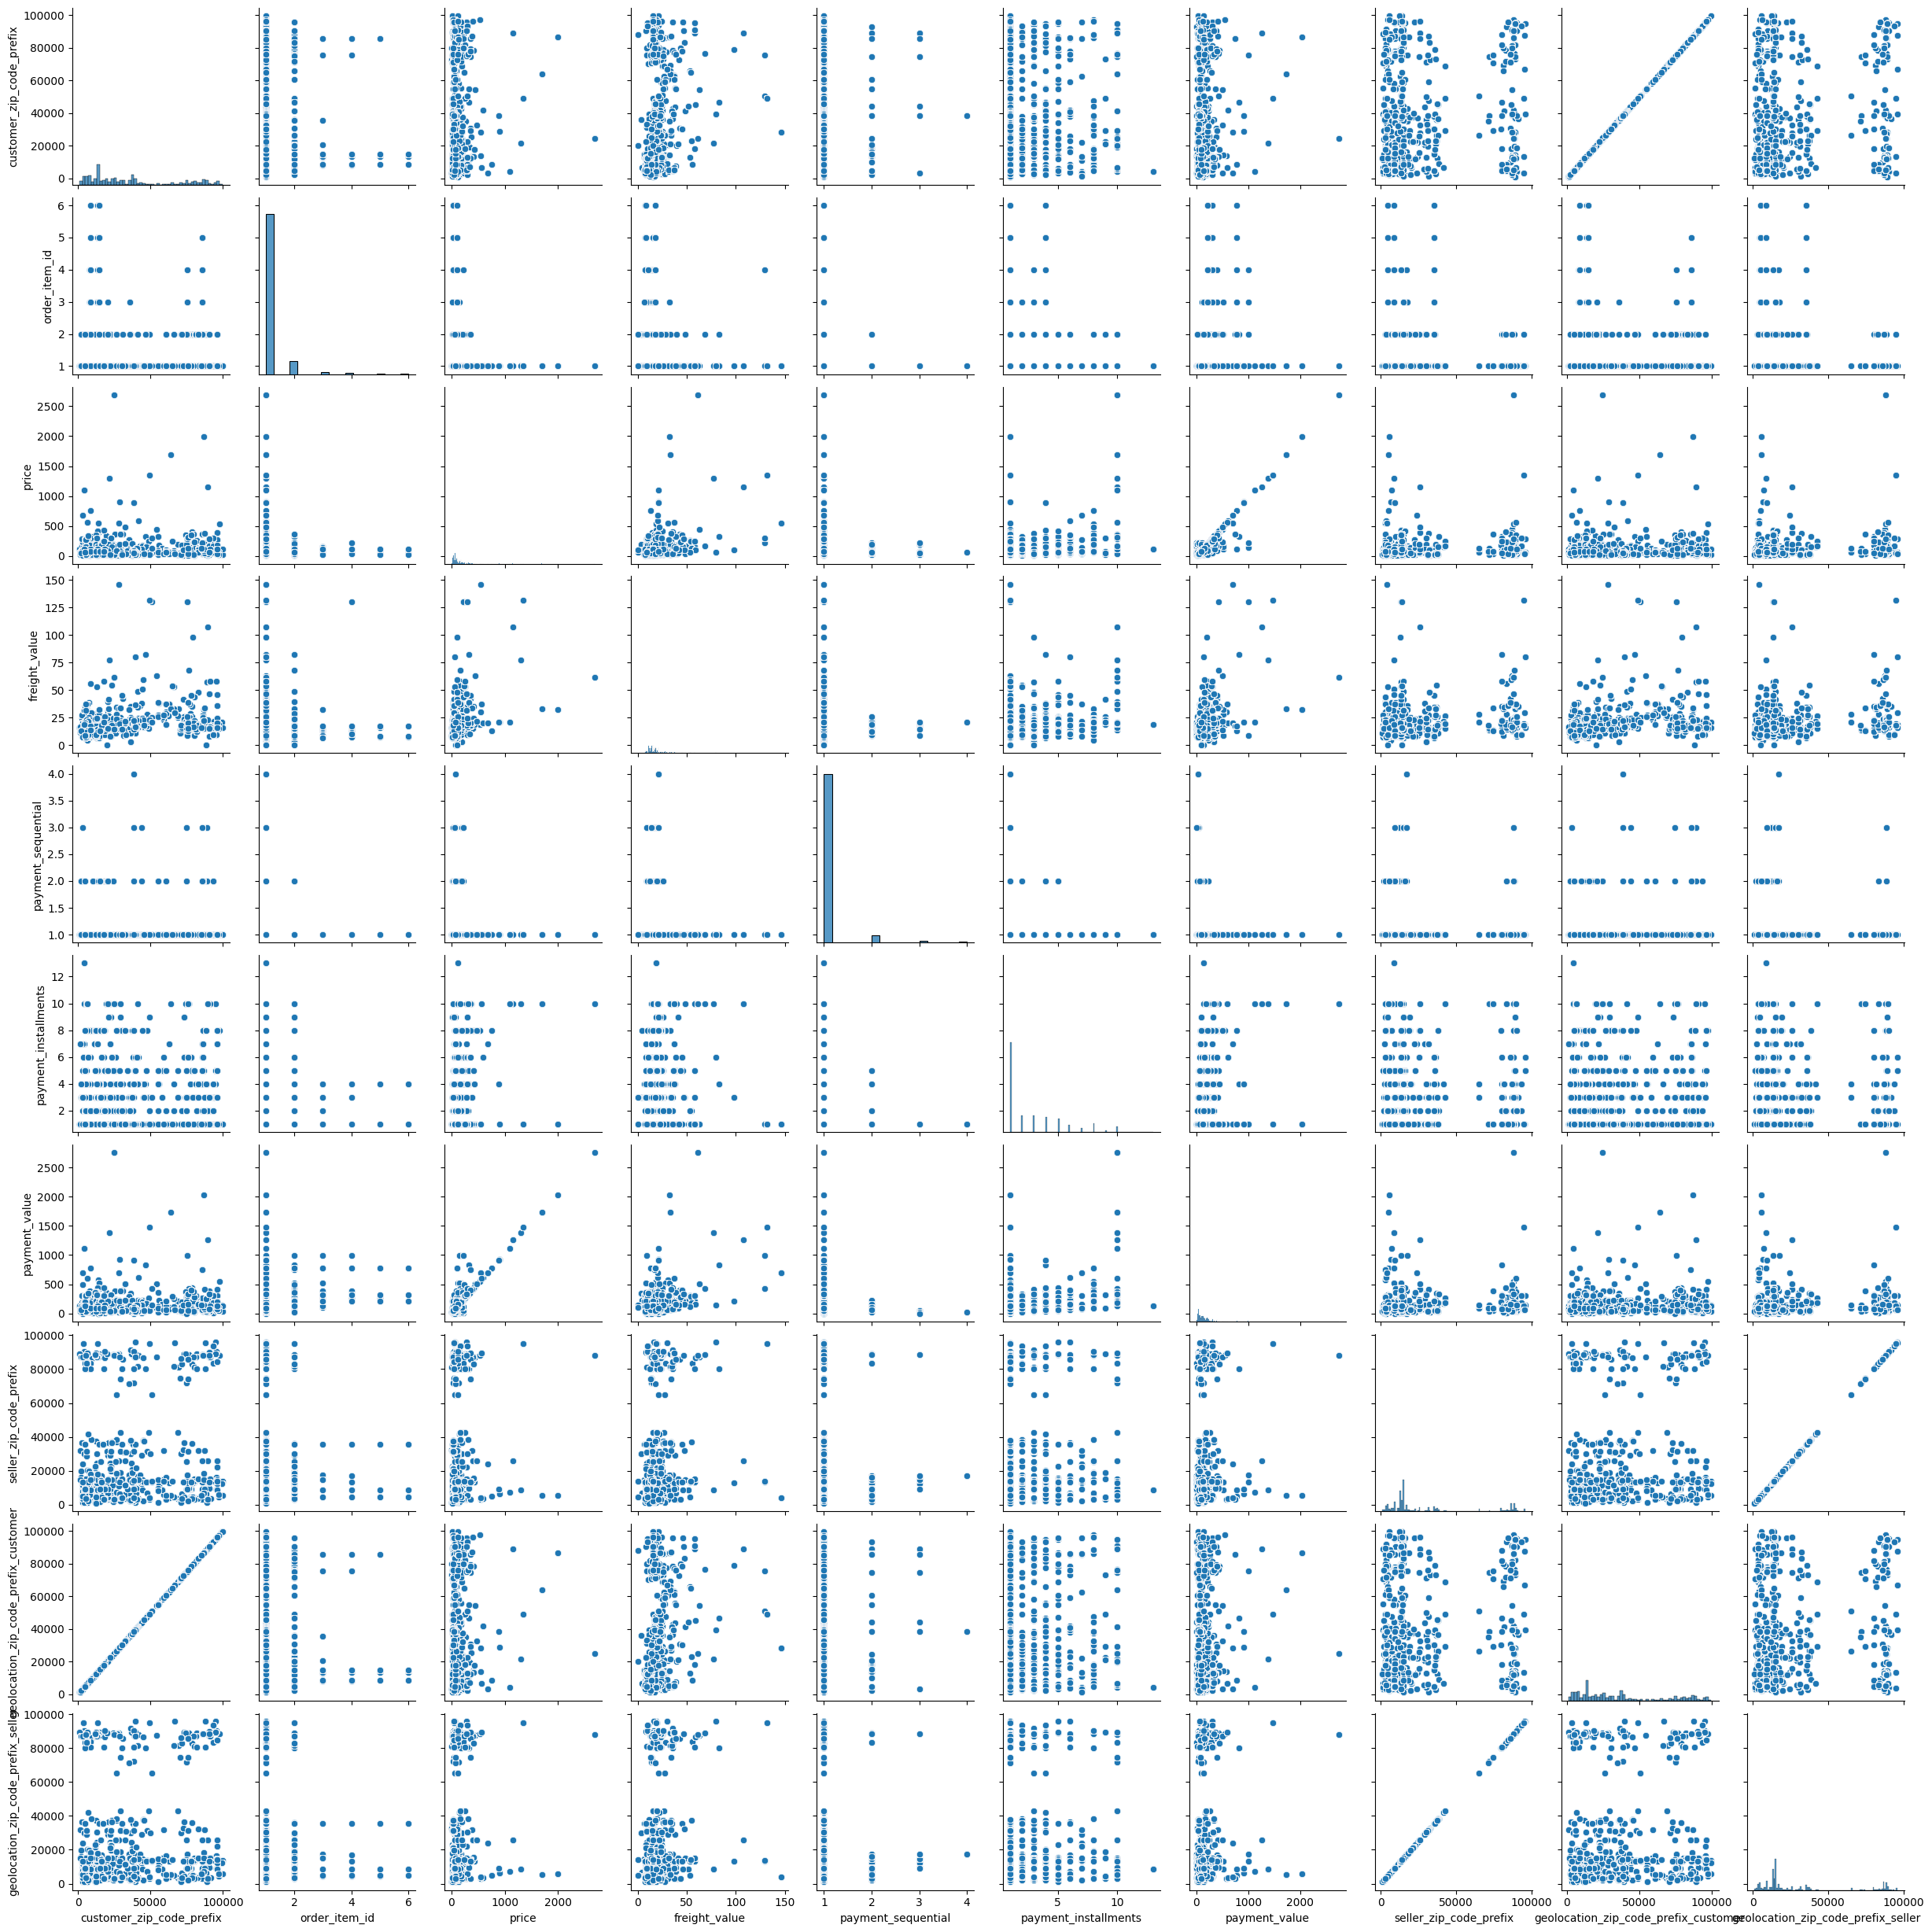

In [18]:

# work on the numerical values
numeric_cols = df_sample.select_dtypes(include=['number'])

# draw Pair Plot
sns.pairplot(numeric_cols)
plt.show()


In [20]:
plt.savefig('C:\\Users\\Amani\\Desktop\\career foundry\\Brazilian E-Commerce project A6\\04 Analysis\\Visualizations\\graph.png')


<Figure size 640x480 with 0 Axes>

#### It's difficult to identify any notable insights from these plots. It appears that net worth doesn't have a strong correlation with any of the other variables. It might be worth exploring further or reconsidering the data.

### 6.Create a categorical plot and interpret the results.


C:\Users\Amani\AppData\Local\Temp\ipykernel_21604\444169735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sample, x='order_status', y='price', palette="coolwarm")


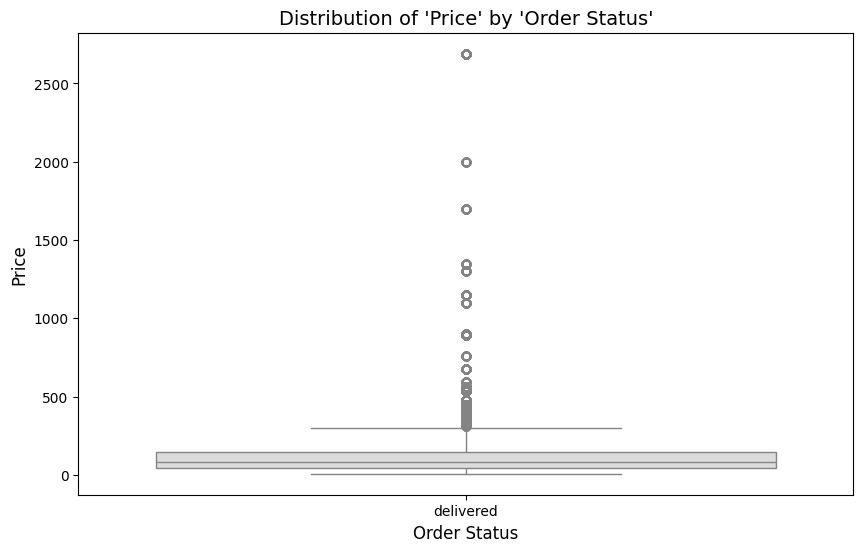

In [25]:

# Example categorical plot - Boxplot of 'price' by 'order_status'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x='order_status', y='price', palette="coolwarm")

# Add labels and title for better readability
plt.title("Distribution of 'Price' by 'Order Status'", fontsize=14)
plt.xlabel("Order Status", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Show the plot
plt.show()


In [26]:
#Export your visualizations as “.png” files

C:\Users\Amani\AppData\Local\Temp\ipykernel_6372\7950628.py:8: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.histplot(data=df_sample, x='price', hue='order_status', multiple='stack', palette=custom_palette, kde=True, alpha=0.7)


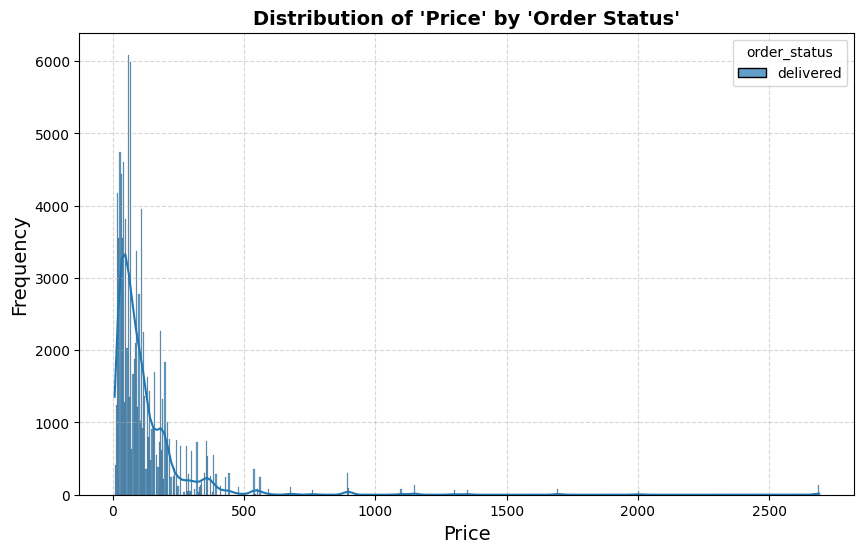

In [23]:
# Example enhanced histogram plot - Distribution of 'Price' by 'Order Status'
plt.figure(figsize=(10, 6))

# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Customize this as needed

# Using histplot with hue for separation by 'order_status' with improved styling
sns.histplot(data=df_sample, x='price', hue='order_status', multiple='stack', palette=custom_palette, kde=True, alpha=0.7)

# Add labels and title for better readability
plt.title("Distribution of 'Price' by 'Order Status'", fontsize=14, weight='bold', color='black')
plt.xlabel("Price", fontsize=14, color='black')
plt.ylabel("Frequency", fontsize=14, color='black')

# Improve the grid and style for clarity
plt.grid(True, linestyle='--', alpha=0.5)  # Lighter grid for a cleaner look

# Show the plot
plt.show()


In [28]:
#Export your visualizations as “.png” files

### 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#### Questions to Explore: 
1. Sales Performance: 
• What are the monthly sales trends, and do they vary across regions? 
• Which product categories generate the highest revenue? 
•      Why do certain months show higher or lower sales? 
•   Why do specific product categories outperform others in revenue?

3. Customer Behaviour: 
• How do customer reviews affect repeat purchases? 
• Is there a correlation between delivery time and customer satisfaction? 
• Why do some customers leave negative reviews despite timely delivery? 
• Why do repeat customers prefer specific product categories?


5. Logistics Efficiency: 
• What is the average delivery time across different regions? 
• How do delivery delays impact customer reviews and overall sales? 
• Why do delivery delays occur more frequently in certain regions? 
• Why do orders from specific states take longer to deliver?


7. Payment Insights:

• What is the most common payment method, and how does it impact order value? 
• Is there a relationship between instalment payments and higher purchase amounts? 
• Why do customers choose instalment payments over single payments? 
• Why do certain payment methods lead to higher average order values? 

8. Geographical Analysis: 
• Which regions have the highest number of orders? 
• How does location influence delivery speed and customer satisfaction? 
• Why do customers from certain regions leave higher reviews? 
• Why do urban areas have faster delivery times compared to rural areas? 

### Apply more analysis and visualization to answer the task questions

##### 1. Sales Performance
What are the monthly sales trends, and do they vary across regions?

Done: You have already created the monthly sales trend plot. To investigate across regions, you can group by customer_state or seller_state and plot sales trends for each region.

In [29]:
# Print the column names of the DataFrame
print(merged_df.columns)


Index(['order_id', 'customer_id', 'order_status',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix_customer',
       'geolocation_city_customer', 'geolocation_state_customer',
       'geolocation_lat_customer', 'geolocation_lng_customer',
       'geolocation_zip_code_prefix_seller', 'geolocation_city_seller',
       'geolocation_state_seller', 'geolocation_lat_seller',
       'geolocation_lng_seller'],
      dtype='object')


##### converted the date column and visualized the monthly sales trends

In [30]:
# Check for missing values in the 'order_estimated_delivery_date' column
print(merged_df['order_estimated_delivery_date'].isnull().sum())

# Check the first few entries to spot any potential issues with the data format
print(merged_df['order_estimated_delivery_date'].head())


0
0    18/10/2017
1    18/10/2017
2    18/10/2017
3    18/10/2017
4    18/10/2017
Name: order_estimated_delivery_date, dtype: object


In [31]:
# Convert 'order_estimated_delivery_date' to datetime format using the correct format (DD/MM/YYYY)
merged_df['order_estimated_delivery_date'] = pd.to_datetime(
    merged_df['order_estimated_delivery_date'], format='%d/%m/%Y', errors='coerce'
)

# Check the first few entries to verify the conversion
print(merged_df['order_estimated_delivery_date'].head())


0   2017-10-18
1   2017-10-18
2   2017-10-18
3   2017-10-18
4   2017-10-18
Name: order_estimated_delivery_date, dtype: datetime64[ns]


In [32]:
# Create new columns for 'month' and 'year'
merged_df['month'] = merged_df['order_estimated_delivery_date'].dt.month
merged_df['year'] = merged_df['order_estimated_delivery_date'].dt.year

# Check the new columns
print(merged_df[['order_estimated_delivery_date', 'month', 'year']].head())


  order_estimated_delivery_date  month  year
0                    2017-10-18     10  2017
1                    2017-10-18     10  2017
2                    2017-10-18     10  2017
3                    2017-10-18     10  2017
4                    2017-10-18     10  2017


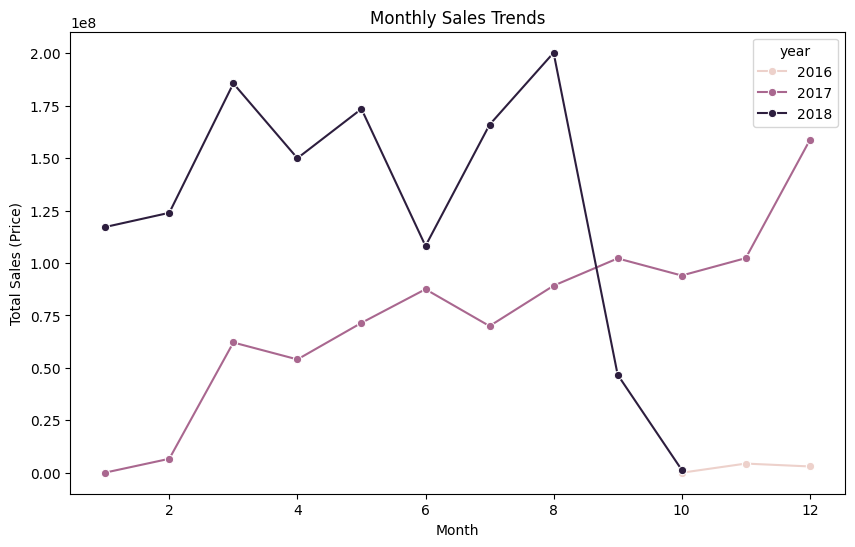

In [33]:
# Group by month and year, then sum up the sales (e.g., price or payment_value)
monthly_sales = merged_df.groupby(['year', 'month'])['price'].sum().reset_index()

# Create a line plot to visualize monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='price', hue='year', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (Price)')
plt.show()


In [34]:
#Export your visualizations as “.png” files

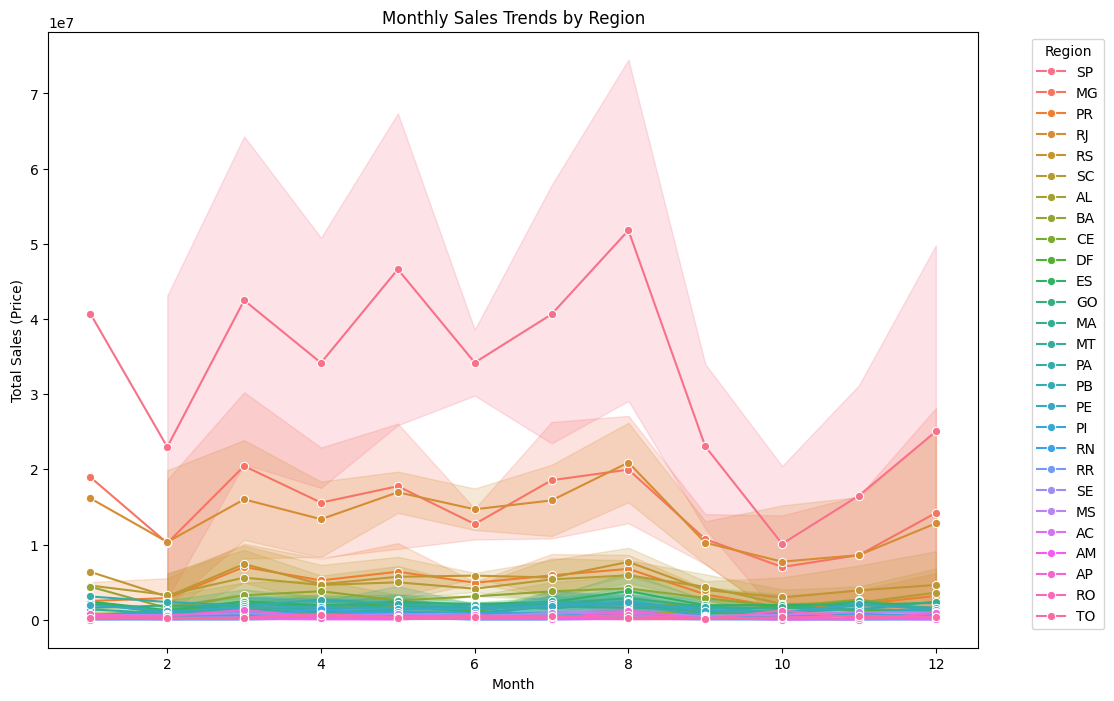

In [35]:
# Group by state and month for sales trends
regional_sales = merged_df.groupby(['year', 'month', 'customer_state'])['price'].sum().reset_index()

# Visualize regional sales trends
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='price', hue='customer_state', data=regional_sales, marker='o')
plt.title('Monthly Sales Trends by Region')
plt.xlabel('Month')
plt.ylabel('Total Sales (Price)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [36]:
#Export your visualizations as “.png” files

##### Which product categories generate the highest revenue?
You can group the data by product_category_name and sum the revenue (price or payment_value).

C:\Users\Amani\AppData\Local\Temp\ipykernel_21604\1519487269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name', data=top_categories, palette='viridis')


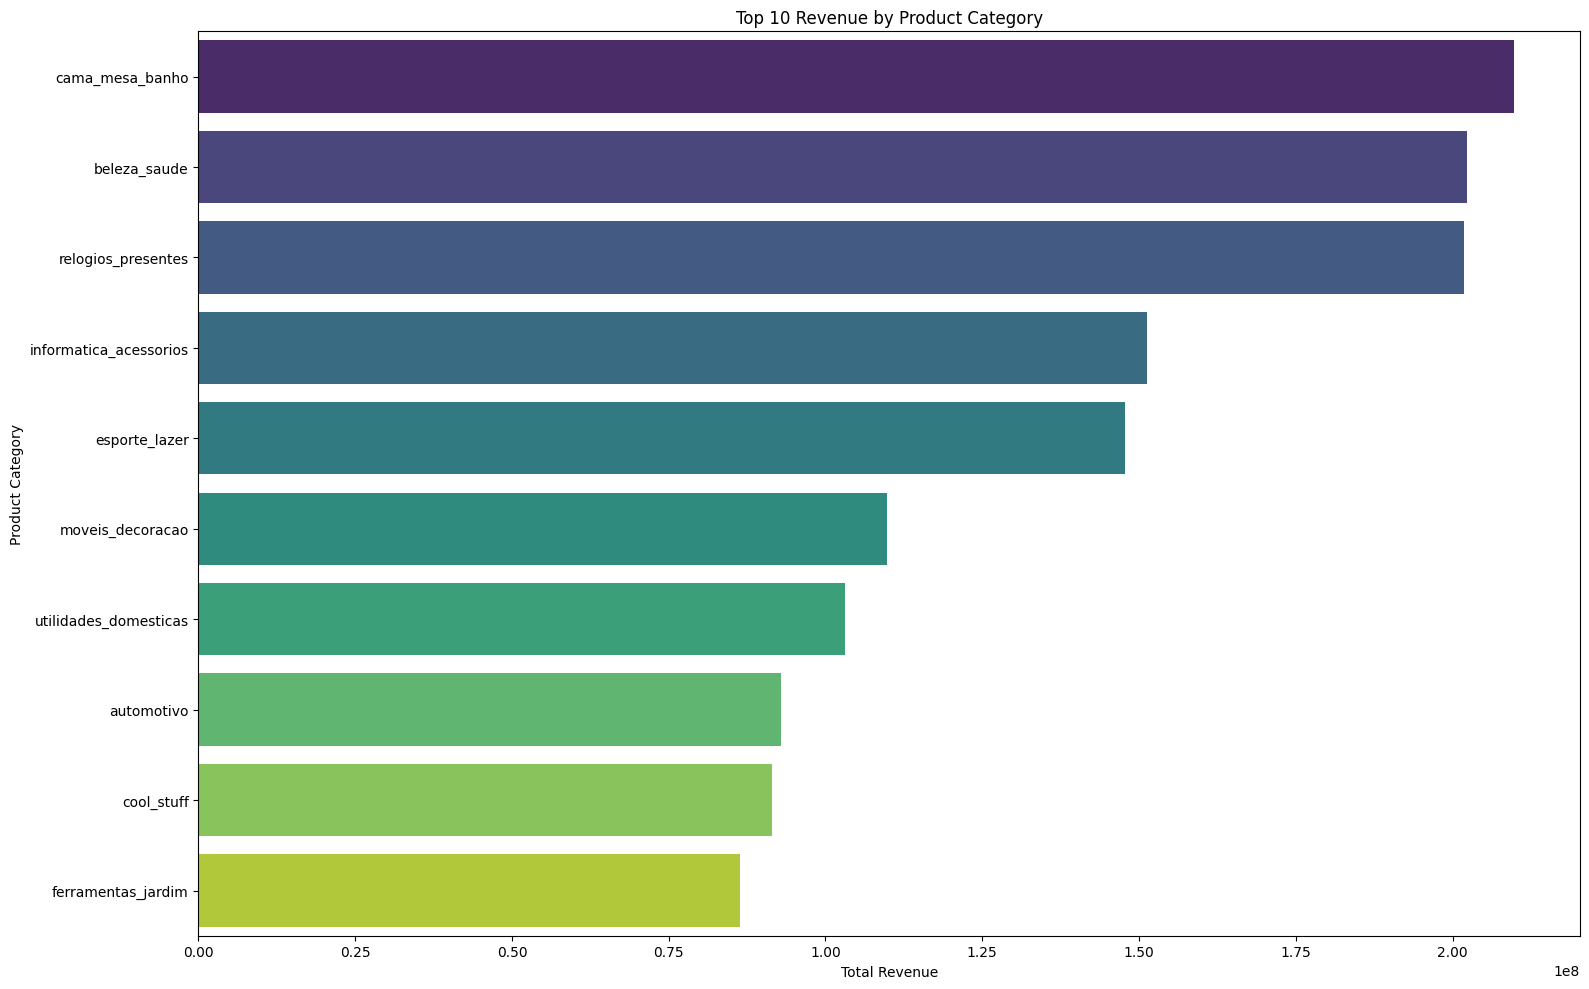

In [38]:
# Grouping by product category and summing the prices to find the most popular categories
category_sales = merged_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).reset_index()

# Find the top 10 categories
top_categories = category_sales.head(10)

# Plotting the top 10 product categories by total revenue
plt.figure(figsize=(16, 10))
sns.barplot(x='price', y='product_category_name', data=top_categories, palette='viridis')
plt.title('Top 10 Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')

plt.tight_layout()
plt.show()



In [39]:
#Export your visualizations as “.png” files

C:\Users\Amani\AppData\Local\Temp\ipykernel_21604\1883366461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name', data=category_sales, palette='viridis')  # Added color palette


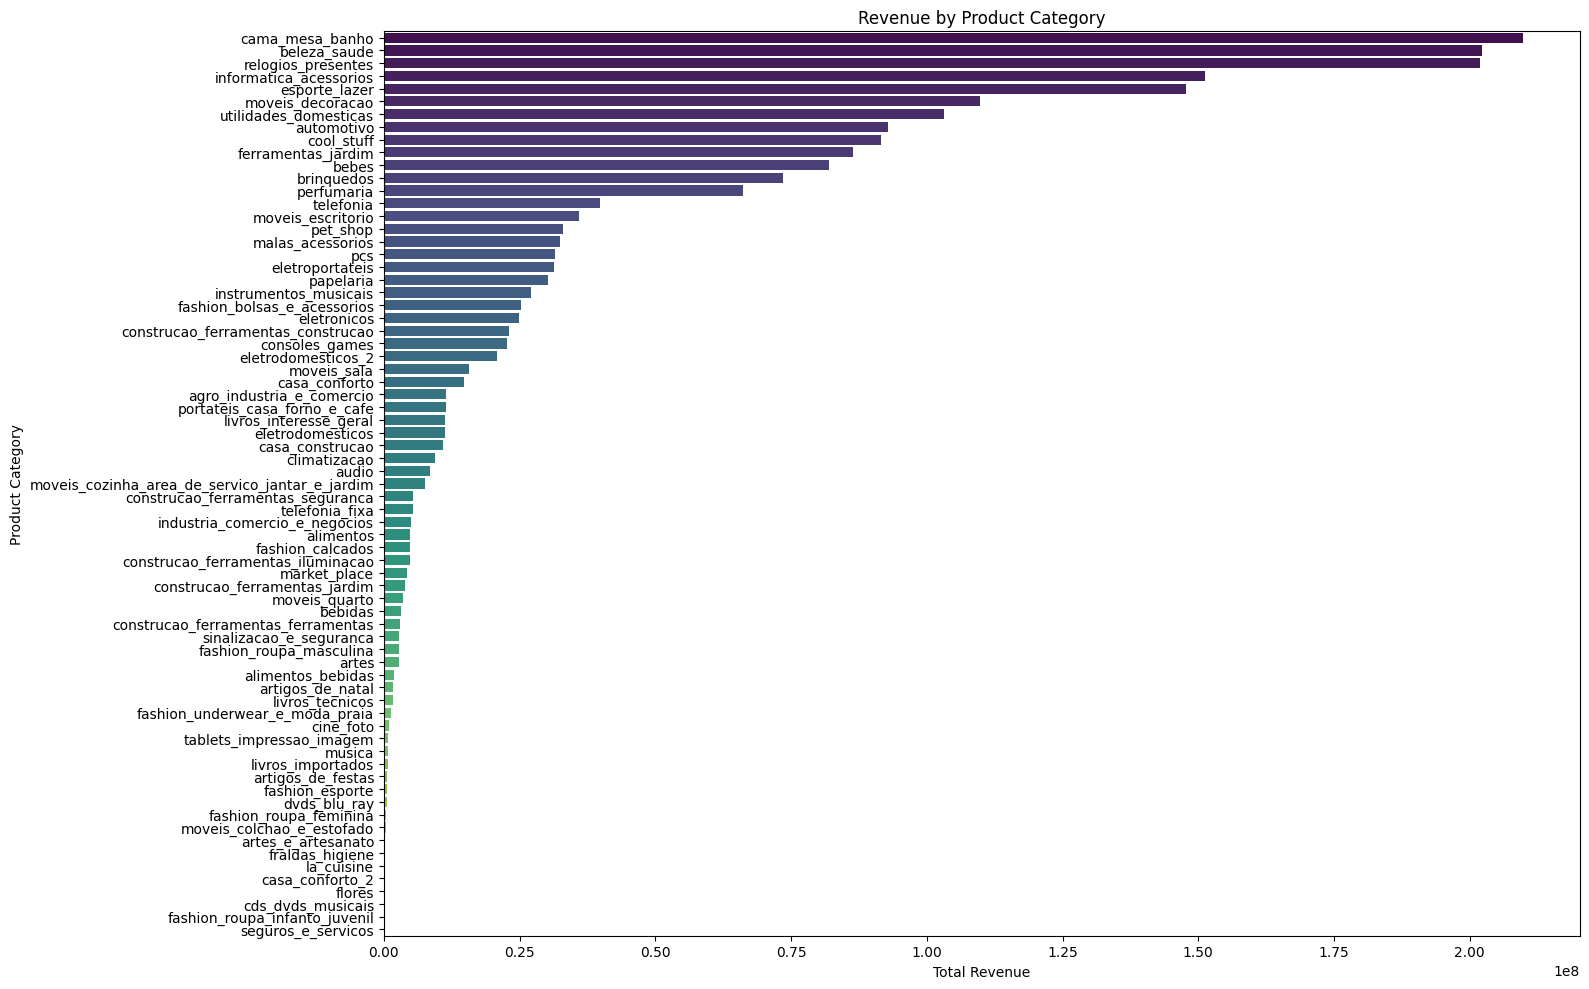

In [59]:
category_sales = merged_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16, 10))  
sns.barplot(x='price', y='product_category_name', data=category_sales, palette='viridis')  # Added color palette

plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')

plt.subplots_adjust(left=0.2, right=0.8, top=0.95, bottom=0.1)  

plt.tight_layout()  
plt.show()


In [41]:
#Export your visualizations as “.png” files

##### Why do certain months show higher or lower sales?


In [42]:
# Print the column names of the DataFrame
print(merged_df.columns)

Index(['order_id', 'customer_id', 'order_status',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix_customer',
       'geolocation_city_customer', 'geolocation_state_customer',
       'geolocation_lat_customer', 'geolocation_lng_customer',
       'geolocation_zip_code_prefix_seller', 'geolocation_city_seller',
       'geolocation_state_seller', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'month', 'year'],
      dtype='object')


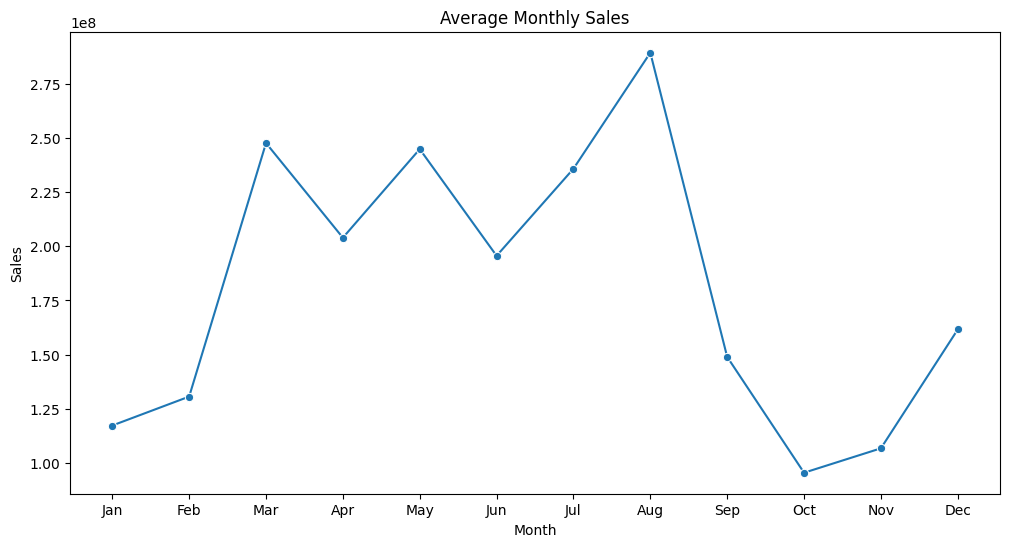

In [43]:
monthly_sales_avg = merged_df.groupby(['month'])['price'].sum().reset_index()

# Plotting the monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_avg, x='month', y='price', marker='o')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
#Export your visualizations as “.png” files

#### 2. Customer Behaviour:


#### Order Frequency per Customer:
This will help us understand how many times a customer makes a purchase.

C:\Users\Amani\AppData\Local\Temp\ipykernel_21604\1951933918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='customer_id', data=top_customers, palette='Blues_d')


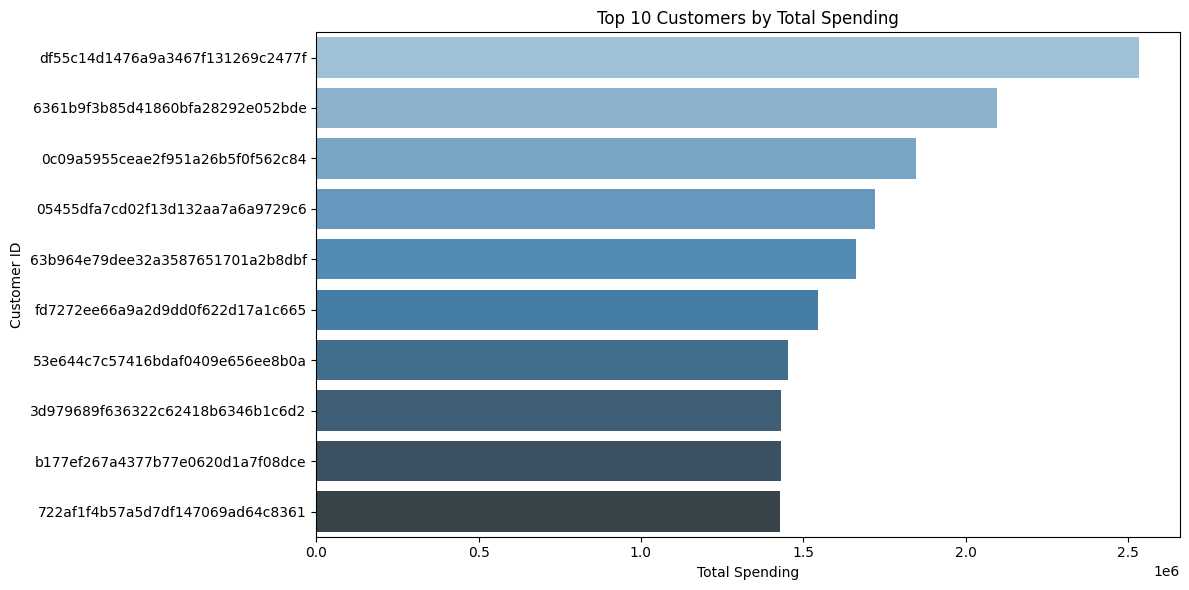

,customer_id,price
0,df55c14d1476a9a3467f131269c2477f,2533872.0
1,6361b9f3b85d41860bfa28292e052bde,2096940.0
2,0c09a5955ceae2f951a26b5f0f562c84,1846605.6
3,05455dfa7cd02f13d132aa7a6a9729c6,1721034.0
4,63b964e79dee32a3587651701a2b8dbf,1661184.0
5,fd7272ee66a9a2d9dd0f622d17a1c665,1544380.2
6,53e644c7c57416bdaf0409e656ee8b0a,1451790.0
7,3d979689f636322c62418b6346b1c6d2,1432080.0
8,b177ef267a4377b77e0620d1a7f08dce,1430460.0
9,722af1f4b57a5d7df147069ad64c8361,1429350.0


In [55]:
# Grouping by 'customer_id' and summing the 'price' to calculate total spending for each customer
top_customers = merged_df.groupby('customer_id')['price'].sum().sort_values(ascending=False).head(10).reset_index()

# Plotting the top 10 customers by total spending
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='customer_id', data=top_customers, palette='Blues_d')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

# Displaying the top customers data
top_customers


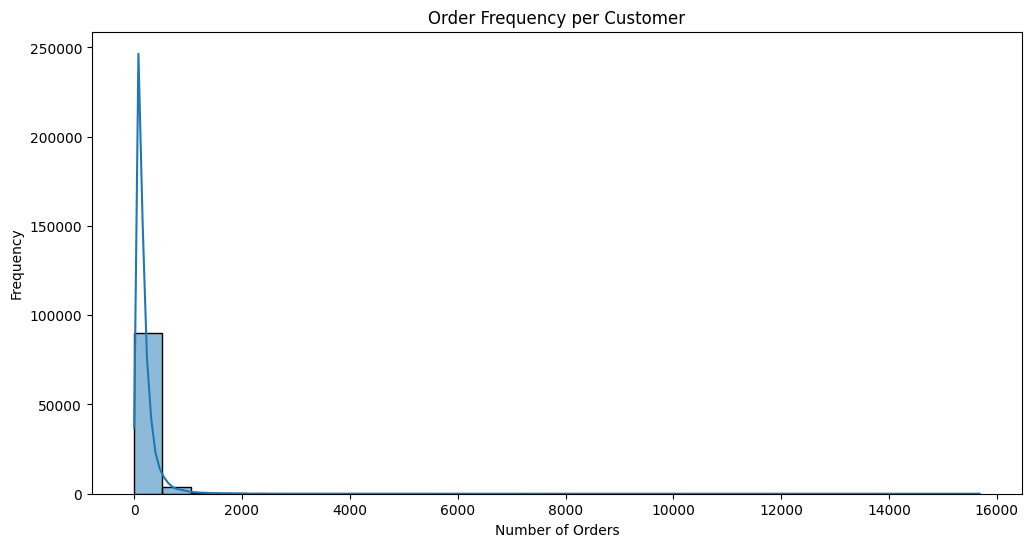

In [44]:
# Count the number of orders per customer
customer_order_count = merged_df.groupby('customer_id').size().reset_index(name='order_count')

# Plotting the distribution of order counts
plt.figure(figsize=(12, 6))
sns.histplot(customer_order_count['order_count'], bins=30, kde=True)
plt.title('Order Frequency per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#Export your visualizations as “.png” files

#### 2. Revenue per Customer:
We can identify high-value customers based on their total revenue.

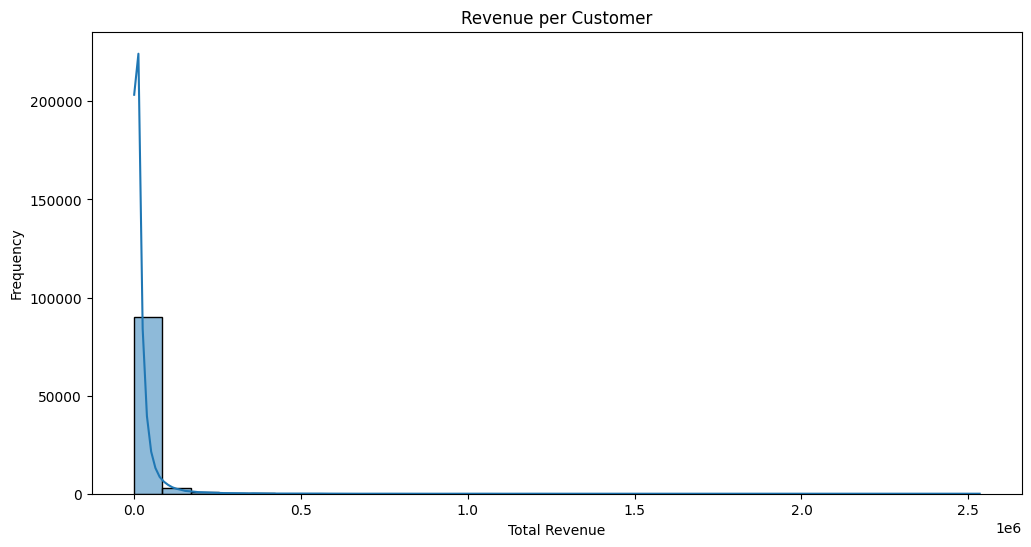

In [45]:
# Calculate total revenue per customer
customer_revenue = merged_df.groupby('customer_id')['price'].sum().reset_index(name='total_revenue')

# Plotting revenue distribution
plt.figure(figsize=(12, 6))
sns.histplot(customer_revenue['total_revenue'], bins=30, kde=True)
plt.title('Revenue per Customer')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#Export your visualizations as “.png” files

#### 3. Most Popular Product Categories:
This helps in understanding which categories are most popular among customers.


C:\Users\Amani\AppData\Local\Temp\ipykernel_21604\1261728491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name', data=category_sales, palette='coolwarm')


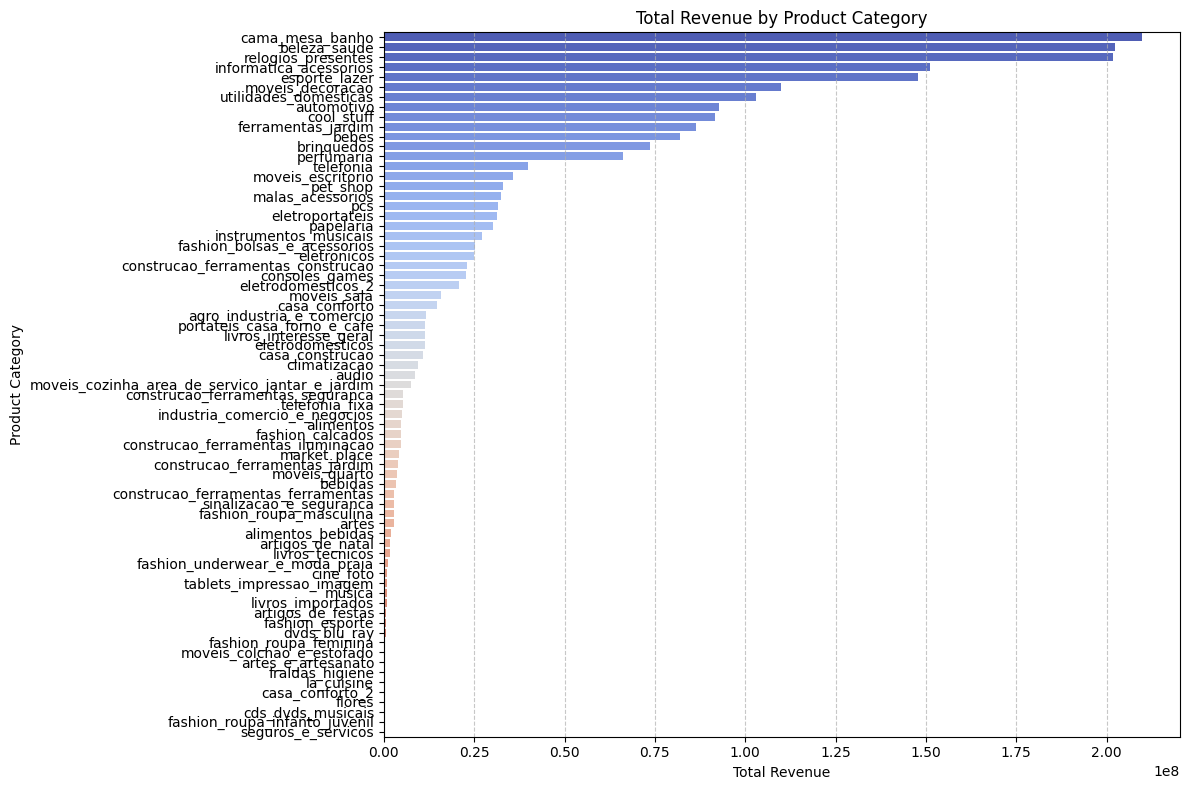

In [57]:
# Plotting the sales by product category
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='product_category_name', data=category_sales, palette='coolwarm')

# Adding gridlines and better label spacing
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjusting tick label positions
plt.yticks(rotation=0, fontsize=10)

# Tight layout to ensure the plot fits within the figure
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
#Export your visualizations as “.png” files

##### the y axis is not clear so we will work on the top 10 category 

C:\Users\Amani\AppData\Local\Temp\ipykernel_21604\4031958408.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name', data=top_category_sales, palette='viridis')  # Change 'viridis' to any other palette


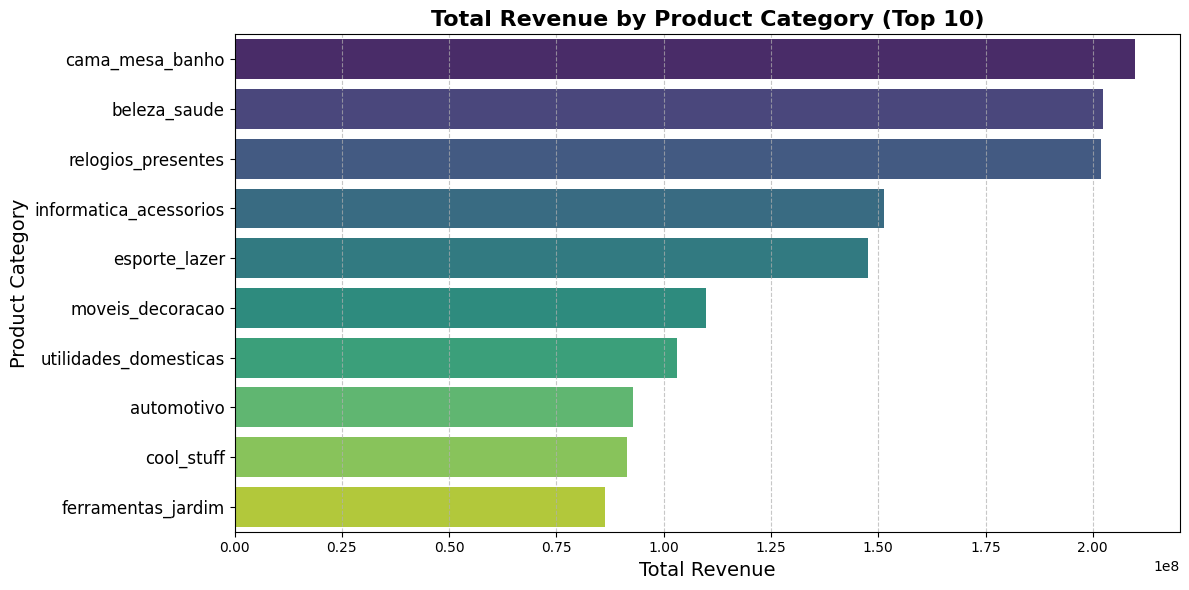

In [47]:
# Grouping by product category and summing the prices
category_sales = merged_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).reset_index()

# Select top 10 categories for better visibility
top_category_sales = category_sales.head(10)

# Plotting the sales by product category
plt.figure(figsize=(12, 6))

# Use a color palette for the bars
sns.barplot(x='price', y='product_category_name', data=top_category_sales, palette='viridis')  # Change 'viridis' to any other palette

# Title and labels with larger font sizes
plt.title('Total Revenue by Product Category (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0, fontsize=12)

# Add grid for better readability of the plot
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust the layout to avoid label clipping
plt.tight_layout()

# Display the plot
plt.show()



In [ ]:
#Export your visualizations as “.png” files

#### Logistics Efficiency
What is the average delivery time across different regions?
Calculate average delivery time for each region:

In [48]:
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'], errors='coerce')
merged_df['shipping_limit_date'] = pd.to_datetime(merged_df['shipping_limit_date'], errors='coerce')

#calculate the difference between the delivery times
merged_df['delivery_time'] = (merged_df['order_estimated_delivery_date'] - merged_df['shipping_limit_date']).dt.days

print(merged_df[['order_estimated_delivery_date', 'shipping_limit_date', 'delivery_time']].head())


  order_estimated_delivery_date shipping_limit_date  delivery_time
0                    2017-10-18 2017-06-10 11:07:00          129.0
1                    2017-10-18 2017-06-10 11:07:00          129.0
2                    2017-10-18 2017-06-10 11:07:00          129.0
3                    2017-10-18 2017-06-10 11:07:00          129.0
4                    2017-10-18 2017-06-10 11:07:00          129.0


C:\Users\Amani\AppData\Local\Temp\ipykernel_21604\2116776620.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='delivery_time', data=region_delivery_time, palette='viridis')


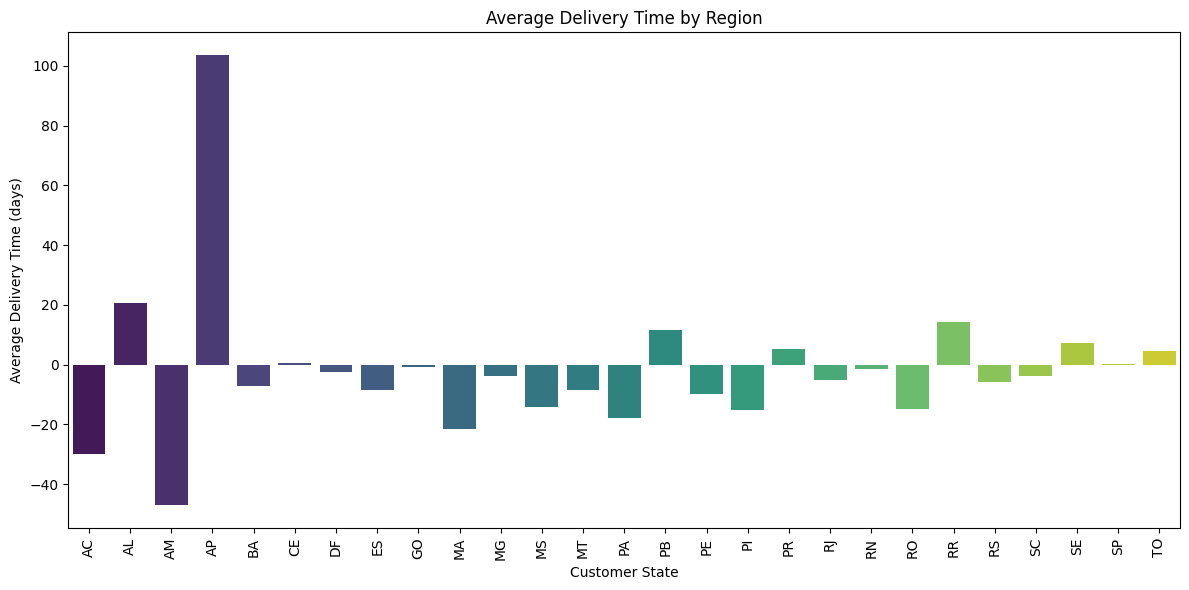

In [50]:
# Make sure 'order_estimated_delivery_date' and 'shipping_limit_date' are in datetime format
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'], errors='coerce')
merged_df['shipping_limit_date'] = pd.to_datetime(merged_df['shipping_limit_date'], errors='coerce')

# Calculate delivery time (in days)
merged_df['delivery_time'] = (merged_df['shipping_limit_date'] - merged_df['order_estimated_delivery_date']).dt.days

# Now, group by 'customer_state' and calculate the average delivery time
region_delivery_time = merged_df.groupby('customer_state')['delivery_time'].mean().reset_index()

# Plotting the average delivery time by customer state
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='delivery_time', data=region_delivery_time, palette='viridis')
plt.title('Average Delivery Time by Region')
plt.xlabel('Customer State')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
#Export your visualizations as “.png” files

#### Payment Insights
What is the most common payment method, and how does it impact order value?

C:\Users\Amani\AppData\Local\Temp\ipykernel_21604\3226302096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_value', y='payment_type', data=payment_method_sales, palette='viridis')


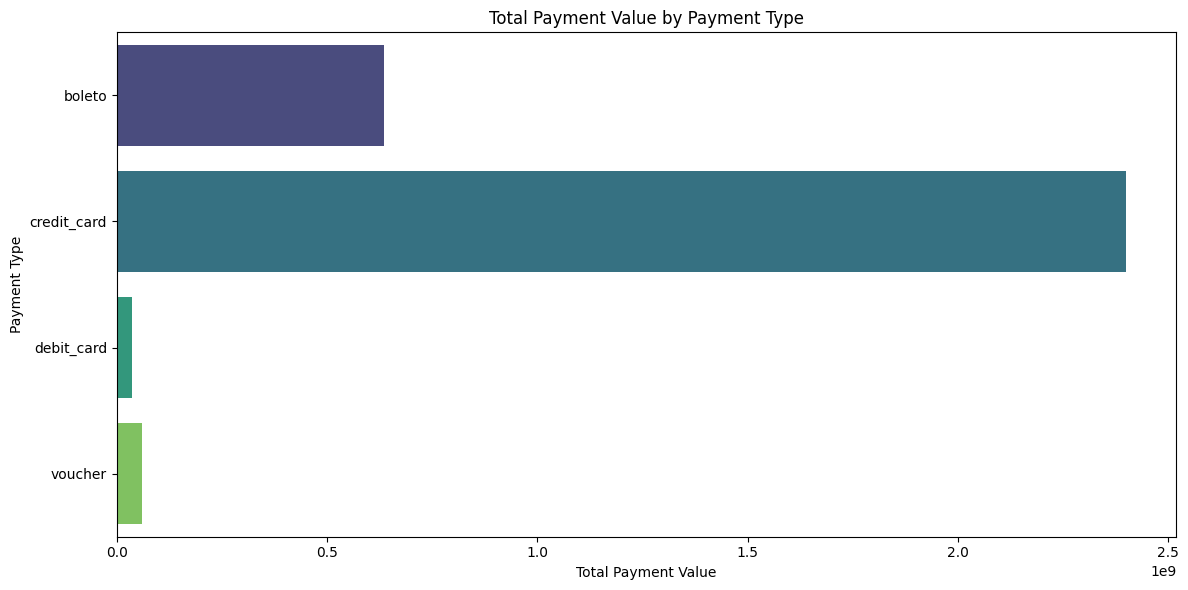

In [56]:
payment_method_sales = merged_df.groupby('payment_type')['payment_value'].sum().reset_index()

# Set up the plot with a color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='payment_value', y='payment_type', data=payment_method_sales, palette='viridis')

# Adding title and labels
plt.title('Total Payment Value by Payment Type')
plt.xlabel('Total Payment Value')
plt.ylabel('Payment Type')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#Export your visualizations as “.png” files

##### Is there a relationship between instalment payments and higher purchase amounts?



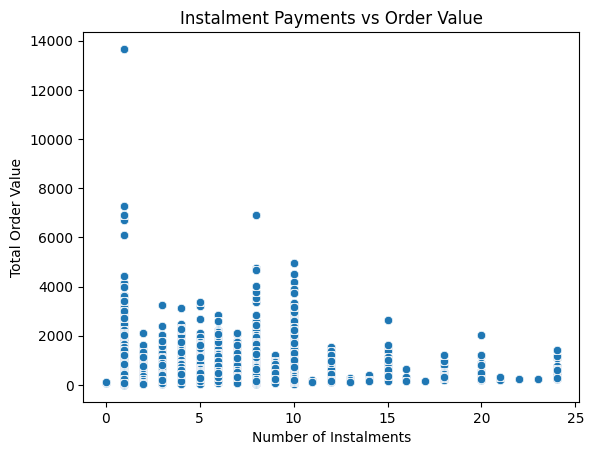

In [52]:
sns.scatterplot(x='payment_installments', y='payment_value', data=merged_df)
plt.title('Instalment Payments vs Order Value')
plt.xlabel('Number of Instalments')
plt.ylabel('Total Order Value')
plt.show()


In [ ]:
#Export your visualizations as “.png” files

### 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

#### Here are some brief hypotheses:

1. **Customer Behavior & Reviews**: Repeat customers give higher review scores.
2. **Payment Installments & Order Value**: More payment installments are correlated with higher order values.
3. **Product Categories**: Higher revenue is generated from specific product categories like electronics.
4. **Delivery Time by Region**: Delivery times vary significantly by customer state/region.
5. **Customer Location & Spend**: Customers from larger cities spend more on average.
6. **Payment Type & Purchase Value**: Credit card users tend to make larger purchases.
7. **Monthly Sales Trends**: Sales in December are higher due to holiday shopping.
8. **Shipping Cost & Order Value**: Higher-value orders have lower relative shipping costs.
9. **Order Status & Delivery Time**: "Delivered" orders have shorter delivery times.
10. **Installments & Frequency**: Customers using payment installments tend to make larger or more frequent purchases.
